In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
import sympy as sp
import matplotlib.pyplot as plt
import gc

from sympy import *
from numpy import linalg as LA
from numpy.linalg import matrix_rank

In [2]:
#Establecer directorio de datos

DIR='/Users/I_am_AlexX/Downloads/Telegram Desktop'
FILE='/adjmatrix_UNT.txt'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))

File directory:/Users/I_am_AlexX/Downloads/Telegram Desktop/adjmatrix_UNT.txt


In [3]:
data=pd.read_table(file)

In [4]:
a=np.diag(np.ones(16748),0)
A=data-a

In [5]:
del a

In [6]:
#Se obtiene el mismo resultado 

threshold= A.mean().mean()
threshold

0.033064517362779086

In [7]:
#Función para ver qué forma tiene la matriz del data set que estamos
#estudiando 

def mat_shape(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    return simm_mat

In [8]:
#Función para contruir la matriz de grado a partir de la de la matriz de adyacencia

def degree_mat_from_adj(mat,n):
    
    simm_mat = mat_shape(mat, n)
     
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx) #obtener la Laplaciana asociada a la de adyacencia
    L_arr=L_from_Adj.toarray()
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    return deg_Mat

In [9]:
#La siguiente función sirve para obtener los elementos de la diagonal de la matriz de
# grado y la guarda en un array llamado out_p


def get_elem_in_diag(Mat):
    Mat_mod = np.squeeze(np.asarray(Mat))#convierte numpy matrix en array
    out_p=[]
    for elem in np.nditer(Mat_mod): #nditer itera sobre arrays
        if elem != 0: # omite los valores 0 en el array pues la matriz de grado fuera de la diagonal tiene solo ceros
            out_p.append(int(elem))
            
    return out_p

In [10]:
# El siguiente módulo, crea un array con los primeros "n" genes que deseen obtener del
# Data Frame "data"

#Parametros: data , n 

def get_genes(data,n):
    
    genes_arr = sorted(data) #obtener un array que contiene los elementos del header del DataFrame
    num_genes_extracted = range(n)
    genes = np.array(genes_arr)[num_genes_extracted]
    
    return genes

In [11]:
#Este script es capaz de dibujar el grafo con sus vértices respectivos etiquetados

#Este módulo ha sifo modificado para que sea capaz de etiquetar los nombres de los genes 
#involucrados

def plt_with_label(mat,n):
    
    simm_mat = mat_shape(mat, n)
    
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    labelmap=dict(zip(adj_to_graph.nodes(),get_genes(data,n)))
    
    plt.figure(1,figsize=(20,20))
    
    nx.draw(adj_to_graph, labels=labelmap, with_labels=True,
    font_size=15,font_weight='bold',font_color='black',edge_color='gray',node_color='green',node_size=200)
    
    graph_with_lab=plt.show()
    
    return graph_with_lab

In [12]:
#Función para obtener el número mayor de una lista de números dentro de un array

def func(a,N):
    return np.argsort(a)[::-1][:N]

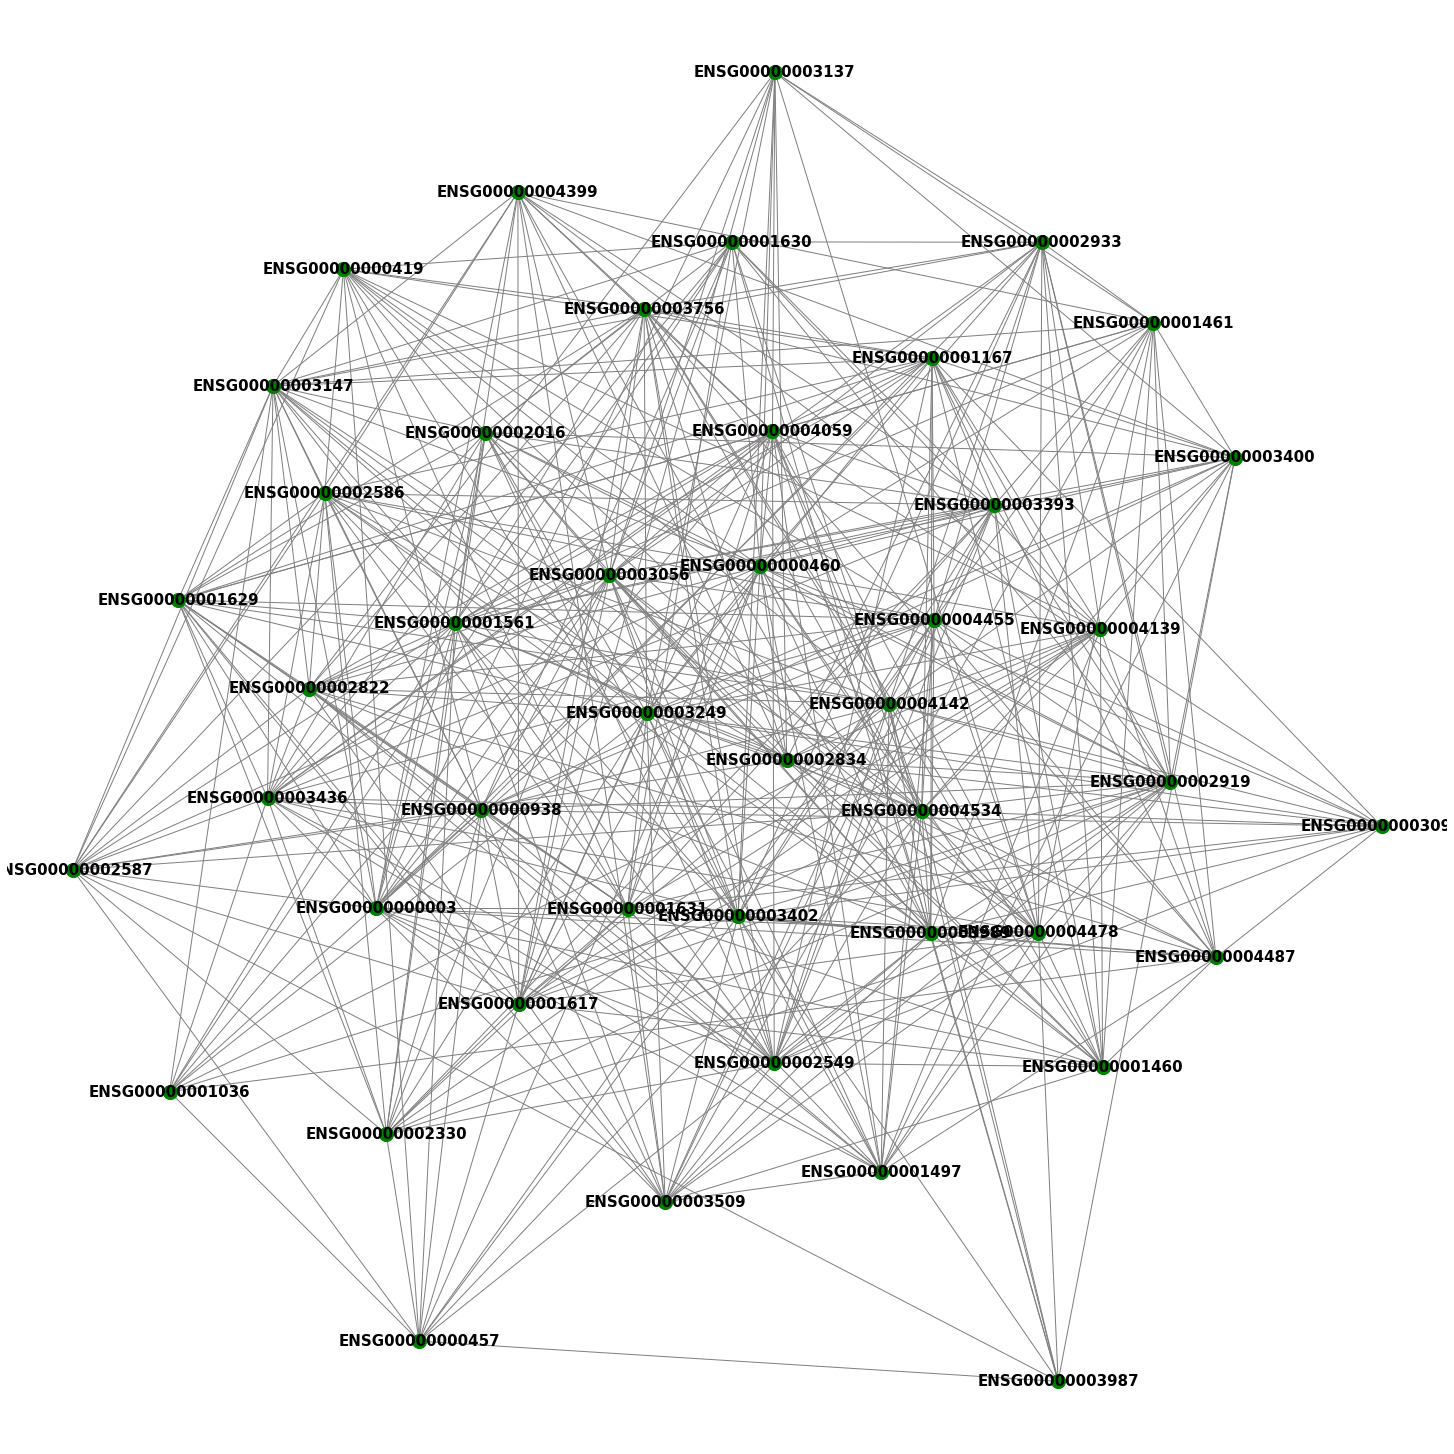

In [98]:
plt_with_label(A,45)

In [99]:
mat_shape(A,5).dot(get_elem_in_diag( degree_mat_from_adj(A,5)))

matrix([[6., 9., 9., 8., 8.]])

In [100]:
type(mat_shape(A,5).dot(get_elem_in_diag( degree_mat_from_adj(A,5))))

numpy.matrix

In [102]:
M5= np.squeeze(np.asarray(mat_shape(A,5).dot(get_elem_in_diag( degree_mat_from_adj(A,5)))))
M5

array([6., 9., 9., 8., 8.])

In [103]:
func(M5,5)

array([2, 1, 4, 3, 0], dtype=int64)

In [106]:
M45=mat_shape(A,45).dot(get_elem_in_diag( degree_mat_from_adj(A,45)))

In [109]:
M45_2=np.squeeze(np.asarray(M45))

In [110]:
func(M45_2,45)

array([24, 44, 17, 10,  3, 22, 28, 36, 14, 37, 31, 42, 27, 32,  0, 34,  6,
       41, 39, 20,  4, 29, 12,  9, 11, 18, 15, 33,  7, 23, 21, 16, 30,  8,
        1, 38, 19, 40, 13, 43, 25, 26,  2,  5, 35], dtype=int64)

In [112]:
get_genes(A,45)[24]

'ENSG00000003056'

In [113]:
get_genes(A,45)[44]

'ENSG00000004534'

In [114]:
get_genes(A,45)[17]

'ENSG00000002549'

In [119]:
get_genes(A,45)[10]

'ENSG00000001561'

In [120]:
get_genes(A,45)[3]

'ENSG00000000460'

In [121]:
func(get_elem_in_diag(degree_mat_from_adj(A,45)),45) 

array([24, 44,  3, 10, 31, 28, 14, 17, 27, 22, 36, 42, 39,  4, 37,  0, 32,
       34,  6, 41, 20, 11, 12, 18, 29,  9, 23, 33,  7, 15, 21, 38,  8, 19,
       30, 16, 43, 13,  1, 40, 25, 26,  2,  5, 35], dtype=int64)

In [122]:
func(M45_2,45)

array([24, 44, 17, 10,  3, 22, 28, 36, 14, 37, 31, 42, 27, 32,  0, 34,  6,
       41, 39, 20,  4, 29, 12,  9, 11, 18, 15, 33,  7, 23, 21, 16, 30,  8,
        1, 38, 19, 40, 13, 43, 25, 26,  2,  5, 35], dtype=int64)